# Sentiment/Emotional Analysis

## Import Libraries

In [2]:
import pandas as pd
import re
from nrclex import NRCLex
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Read Data

In [3]:
df = pd.read_csv('../data/original/webmd_reviews.csv')

In [4]:
df.head()

,Rdate,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
0,9/19/07 9:03,The medication has helped me keep my 2 month s...,Type 2 Diabetes Mellitus,metformin oral,5,4,2,"bjorn, 65-74 Male on Treatment for 2 to less ...",3
1,9/18/07 11:18,NaN,Type 2 Diabetes Mellitus,metformin oral,5,4,9,"cutie54, 45-54 Female on Treatment for 1 to 6...",5
2,4/24/11 8:59,I have just started to take this drug for a st...,Type 2 Diabetes Mellitus,Kombiglyze XR oral,5,4,3,"jarele, 25-34 Male on Treatment for less than...",4
3,4/5/11 13:31,NaN,Type 2 Diabetes Mellitus,Kombiglyze XR oral,5,4,4,25-34 Female on Treatment for less than 1 mon...,4
4,3/7/11 16:35,NaN,Type 2 Diabetes Mellitus,Kombiglyze XR oral,3,1,8,45-54 Male (Patient),1


In [5]:
df.isnull().sum()

Rdate               0
comment          4520
condition           0
drug                0
easeofuse           0
effectiveness       0
helpful             0
reviewer          253
satisfaction        0
dtype: int64

In [6]:
df.shape

(5495, 9)

In [7]:
df.dropna(inplace = True)

In [8]:
comment = ','.join(df['comment'])
text_obj = NRCLex(comment)

In [9]:
data = text_obj.raw_emotion_scores
data

{'anger': 387,
 'negative': 1436,
 'positive': 1419,
 'sadness': 861,
 'anticipation': 700,
 'disgust': 620,
 'fear': 759,
 'joy': 469,
 'surprise': 372,
 'trust': 773}

In [10]:
emotion_df = pd.DataFrame.from_dict(data, orient = 'index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns = {'index' : 'Emotion', 0 : 'Count'})
emotion_df = emotion_df.sort_values(by = ['Count'], ascending = False)

In [11]:
emotion_df

,Emotion,Count
1,negative,1436
2,positive,1419
3,sadness,861
9,trust,773
6,fear,759
4,anticipation,700
5,disgust,620
7,joy,469
0,anger,387
8,surprise,372


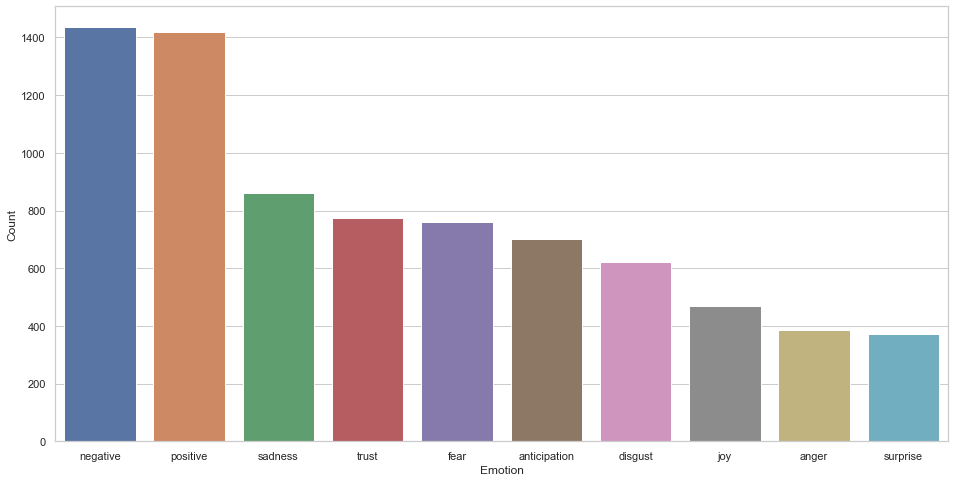

In [12]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (16, 8))
sns.barplot(x = 'Emotion', y = 'Count', data = emotion_df);

# Sentiment analysis by drugs

In [13]:
df.drug.value_counts()

metformin oral              195
Actos oral                   98
Januvia oral                 66
Byetta subcutaneous          63
Invokana oral                38
                           ... 
glipizide-metformin oral      2
Novolin R injection           2
Avandaryl oral                2
Invokamet oral                1
Glucotrol XL oral             1
Name: drug, Length: 70, dtype: int64

In [14]:
print(len(df.drug.unique()))

70


In [15]:
drug_type = list(df.drug.unique())
drug_type[:5]

['metformin oral',
 'Kombiglyze XR oral',
 'Afrezza inhalation',
 'Glumetza oral',
 'Farxiga oral']

### Sentiment by drug type

In [16]:
comment = ','.join(df['comment'])
text_obj = NRCLex(comment)


In [17]:
text_obj = NRCLex(comment)

In [18]:
emo_data = text_obj.raw_emotion_scores
emo_data

{'anger': 387,
 'negative': 1436,
 'positive': 1419,
 'sadness': 861,
 'anticipation': 700,
 'disgust': 620,
 'fear': 759,
 'joy': 469,
 'surprise': 372,
 'trust': 773}

In [19]:
df[df['drug'] == 'metformin oral'].comment

0       The medication has helped me keep my 2 month s...
1153    EVER THING I EAT OR DRINK FOR 7 MONTHS IS BITT...
1168    This medicine has really helped my sugar level...
1173    Undiagnosed for years diagnosed with HgbA1c Ap...
1178    Been on metformin since diagnosis in 2005, wit...
                              ...                        
2353    I have taken this drug for 4 years and lately ...
2358    i have taken 2000 per day for 25 years. now i ...
2363    I was diagnosed with Type 2 diabetes 1.5 month...
2368    I took 1 dose, and my entire GI system suffere...
2373    after a week----mouth ulccers,cudnt talk,eat,d...
Name: comment, Length: 195, dtype: object

In [20]:
comment = ','.join(df['comment'])
text_obj = NRCLex(comment)

In [21]:
drug_df_list = []


for drug in drug_type:
    #sentiment analysis
    comment = ','.join(df[df['drug'] == drug].comment)
    text_obj = NRCLex(comment)
    emo_df = text_obj.raw_emotion_scores
   
    
    drug_df_list.append(emo_df)
    

In [22]:
drug_df_list[0:3]

[{'positive': 243,
  'negative': 283,
  'anger': 81,
  'fear': 117,
  'sadness': 146,
  'anticipation': 120,
  'trust': 145,
  'disgust': 132,
  'surprise': 69,
  'joy': 83},
 {'joy': 3,
  'positive': 17,
  'trust': 7,
  'anticipation': 4,
  'disgust': 8,
  'fear': 7,
  'negative': 12,
  'sadness': 10,
  'surprise': 1,
  'anger': 6},
 {'anger': 1, 'negative': 1, 'positive': 1, 'anticipation': 1}]

In [23]:
sentiment_df = pd.DataFrame.from_dict(drug_df_list)

In [24]:
sentiment_df.head()

,positive,negative,anger,fear,sadness,anticipation,trust,disgust,surprise,joy
0,243,283.0,81.0,117.0,146.0,120.0,145.0,132.0,69.0,83.0
1,17,12.0,6.0,7.0,10.0,4.0,7.0,8.0,1.0,3.0
2,1,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,10,8.0,3.0,7.0,3.0,7.0,4.0,5.0,2.0,5.0
4,34,34.0,11.0,24.0,28.0,22.0,18.0,10.0,11.0,14.0


In [25]:
sentiment_df.index = drug_type
sentiment_df

,positive,negative,anger,fear,sadness,anticipation,trust,disgust,surprise,joy
metformin oral,243,283.0,81.0,117.0,146.0,120.0,145.0,132.0,69.0,83.0
Kombiglyze XR oral,17,12.0,6.0,7.0,10.0,4.0,7.0,8.0,1.0,3.0
Afrezza inhalation,1,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Glumetza oral,10,8.0,3.0,7.0,3.0,7.0,4.0,5.0,2.0,5.0
Farxiga oral,34,34.0,11.0,24.0,28.0,22.0,18.0,10.0,11.0,14.0
...,...,...,...,...,...,...,...,...,...,...
Byetta subcutaneous,104,134.0,37.0,68.0,93.0,60.0,58.0,72.0,35.0,49.0
Actos oral,149,141.0,35.0,89.0,89.0,85.0,75.0,52.0,38.0,53.0
Januvia oral,104,101.0,19.0,55.0,65.0,45.0,49.0,42.0,17.0,22.0
glimepiride oral,47,41.0,13.0,23.0,22.0,17.0,24.0,20.0,3.0,5.0


# Sentiment analysis by drugs: Visualization of Top 10 Drugs

In [26]:
df.head()

,Rdate,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
0,9/19/07 9:03,The medication has helped me keep my 2 month s...,Type 2 Diabetes Mellitus,metformin oral,5,4,2,"bjorn, 65-74 Male on Treatment for 2 to less ...",3
2,4/24/11 8:59,I have just started to take this drug for a st...,Type 2 Diabetes Mellitus,Kombiglyze XR oral,5,4,3,"jarele, 25-34 Male on Treatment for less than...",4
5,3/25/15 12:34,Doesn't work. Cough is intolerable. Dosing doe...,Type 2 Diabetes Mellitus,Afrezza inhalation,1,1,0,"Brewman , 55-64 Male on Treatment for 1 to 6 ...",1
8,9/27/07 11:30,Had been on glucophage for 2 years but had to ...,Type 2 Diabetes Mellitus,Glumetza oral,5,3,1,"maureen, 65-74 Female on Treatment for 6 mont...",3
12,6/2/14 23:57,Farxiga is the first oral med to work for me. ...,Type 2 Diabetes Mellitus,Farxiga oral,5,5,3,"jumikja, 55-64 Female on Treatment for 1 to 6...",5


In [27]:
count_df = df['drug'].value_counts()
count_df

metformin oral              195
Actos oral                   98
Januvia oral                 66
Byetta subcutaneous          63
Invokana oral                38
                           ... 
glipizide-metformin oral      2
Novolin R injection           2
Avandaryl oral                2
Invokamet oral                1
Glucotrol XL oral             1
Name: drug, Length: 70, dtype: int64

In [28]:
viz_df = df[['easeofuse', 'effectiveness', 'satisfaction', 'drug']]
viz_df

,easeofuse,effectiveness,satisfaction,drug
0,5,4,3,metformin oral
2,5,4,4,Kombiglyze XR oral
5,1,1,1,Afrezza inhalation
8,5,3,3,Glumetza oral
12,5,5,5,Farxiga oral
...,...,...,...,...
5470,5,5,5,Victoza 2-Pak subcutaneous
5475,5,4,3,Victoza 2-Pak subcutaneous
5480,4,3,2,Victoza 2-Pak subcutaneous
5485,5,5,5,Victoza 2-Pak subcutaneous


In [29]:
drug_satis_df = viz_df.groupby(['drug']).mean().round(2)
drug_satis_df

,easeofuse,effectiveness,satisfaction
drug,,,
Actoplus MET oral,4.09,3.45,2.82
Actos oral,3.80,3.12,2.39
Admelog U-100 Insulin lispro subcutaneous,2.00,1.00,1.00
Afrezza inhalation,3.67,3.67,3.67
Amaryl oral,4.36,3.50,2.93
...,...,...,...
metformin oral,3.76,3.18,2.75
nateglinide oral,4.50,3.00,2.50
pioglitazone oral,3.75,2.50,2.25


In [30]:
drug_satis_df['count'] = count_df
df_drug = drug_satis_df.reset_index()
df_drug

,drug,easeofuse,effectiveness,satisfaction,count
0,Actoplus MET oral,4.09,3.45,2.82,11
1,Actos oral,3.80,3.12,2.39,98
2,Admelog U-100 Insulin lispro subcutaneous,2.00,1.00,1.00,2
3,Afrezza inhalation,3.67,3.67,3.67,3
4,Amaryl oral,4.36,3.50,2.93,14
...,...,...,...,...,...
65,metformin oral,3.76,3.18,2.75,195
66,nateglinide oral,4.50,3.00,2.50,2
67,pioglitazone oral,3.75,2.50,2.25,8
68,pioglitazone-metformin oral,3.50,3.50,3.50,2


In [31]:
df_drug['drug'].values

array(['Actoplus MET oral', 'Actos oral',
       'Admelog U-100 Insulin lispro subcutaneous', 'Afrezza inhalation',
       'Amaryl oral', 'Apidra subcutaneous', 'Avandamet oral',
       'Avandaryl oral', 'Avandia oral', 'Bydureon subcutaneous',
       'Byetta subcutaneous', 'DUETACT oral', 'Farxiga oral',
       'Fortamet oral', 'Glucophage XR oral', 'Glucophage oral',
       'Glucotrol XL oral', 'Glucotrol oral', 'Glucovance oral',
       'Glumetza oral', 'Glyxambi oral', 'Humalog KwikPen subcutaneous',
       'Humalog Mix 75-25 KwikPen subcutaneous',
       'Humalog Mix 75-25 subcutaneous', 'Humalog subcutaneous',
       'Humulin 70-30 subcutaneous', 'Invokamet oral', 'Invokana oral',
       'Janumet XR oral', 'Janumet oral', 'Januvia oral',
       'Jardiance oral', 'Jentadueto oral', 'Kombiglyze XR oral',
       'Lantus Solostar subcutaneous', 'Lantus subcutaneous',
       'Levemir FlexTouch subcutaneous', 'Levemir Flexpen subcutaneous',
       'Levemir subcutaneous', 'Micronase ora

In [32]:
keyword = ['oral', 'subcutaneous', 'inhal']
df_drug['type'] = df_drug['drug'].str.findall('|'.join(keyword)).apply(set).str.join(', ')

In [33]:
df_drug.loc[df_drug['type'] == '']

,drug,easeofuse,effectiveness,satisfaction,count,type
40,Novolin R injection,1.0,1.5,1.0,2,


In [34]:
df_drug['type'].replace({'':'subcutaneous'}, inplace = True)

In [35]:
df_drug['type'].replace({'inhal':'inhaler'}, inplace = True)

In [36]:
df_drug['type'].value_counts()

oral            45
subcutaneous    24
inhaler          1
Name: type, dtype: int64

In [37]:
df_drug

,drug,easeofuse,effectiveness,satisfaction,count,type
0,Actoplus MET oral,4.09,3.45,2.82,11,oral
1,Actos oral,3.80,3.12,2.39,98,oral
2,Admelog U-100 Insulin lispro subcutaneous,2.00,1.00,1.00,2,subcutaneous
3,Afrezza inhalation,3.67,3.67,3.67,3,inhaler
4,Amaryl oral,4.36,3.50,2.93,14,oral
...,...,...,...,...,...,...
65,metformin oral,3.76,3.18,2.75,195,oral
66,nateglinide oral,4.50,3.00,2.50,2,oral
67,pioglitazone oral,3.75,2.50,2.25,8,oral
68,pioglitazone-metformin oral,3.50,3.50,3.50,2,oral


In [38]:
df_drug.replace(['oral', 'subcutaneous'], ['pill', 'injection'], inplace = True)

In [39]:
df_drug.head()

,drug,easeofuse,effectiveness,satisfaction,count,type
0,Actoplus MET oral,4.09,3.45,2.82,11,pill
1,Actos oral,3.80,3.12,2.39,98,pill
2,Admelog U-100 Insulin lispro subcutaneous,2.00,1.00,1.00,2,injection
3,Afrezza inhalation,3.67,3.67,3.67,3,inhaler
4,Amaryl oral,4.36,3.50,2.93,14,pill


In [40]:
df_drug.to_pickle("./sentiment.pkl")  

### Effectiveness v. Satisfaction: with Reviews

In [41]:
import plotly.graph_objects as go

In [46]:
hover_text = []
bubble_size = []

for index, row in df_drug.iterrows():
    hover_text.append(('Drug: {drug} <br>'+
                      'Effectiveness: {effectiveness} <br>'+
                      'Satisfactoin: {satisfaction} <br>'+
                      'Review: {review}').format(drug=row['drug'],
                                            effectiveness=row['effectiveness'],
                                            easeofuse = row['easeofuse'],
                                            satisfaction=row['satisfaction'],
                                            review = row['count']))
    bubble_size.append(row['count'])

df_drug['text'] = hover_text
df_drug['count'] = bubble_size
sizeref = 2.*max(df_drug['count'])/(100**2)

drug_types = ['pill', 'injection', 'inhaler']
drug_data = {drug:df_drug.query("type == '%s'" %drug)
                              for drug in drug_types}

# Create figure
fig = go.Figure()

for drug_types, drug in drug_data.items():
    fig.add_trace(go.Scatter(
        x=drug['effectiveness'], y=drug['satisfaction'],
        name=drug_types, text=drug['text'],
        marker_size=df_drug['count'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Effectiveness v. Satisfaction: with Reviews',
    xaxis=dict(
        title='Dibetes: Type 2 Drug Effectiveness',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Drug Satisfacttion',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

### Ease of Use v. Satisfaction: with Reviews

In [47]:
hover_text = []
bubble_size = []

for index, row in df_drug.iterrows():
    hover_text.append(('Drug: {drug} <br>'+
                      'Effectiveness: {effectiveness} <br>'+
                      'Satisfactoin: {satisfaction} <br>'+
                      'Review: {review}').format(drug=row['drug'],
                                            effectiveness=row['effectiveness'],
                                            easeofuse = row['easeofuse'],
                                            satisfaction=row['satisfaction'],
                                            review = row['count']))
    bubble_size.append(row['count'])

df_drug['text'] = hover_text
df_drug['count'] = bubble_size
sizeref = 2.*max(df_drug['count'])/(100**2)

drug_types = ['pill', 'injection', 'inhaler']
drug_data = {drug:df_drug.query("type == '%s'" %drug)
                              for drug in drug_types}

# Create figure
fig = go.Figure()

for drug_types, drug in drug_data.items():
    fig.add_trace(go.Scatter(
        x=drug['easeofuse'], y=drug['satisfaction'],
        name=drug_types, text=drug['text'],
        marker_size=df_drug['count']
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Ease of Use v. Satisfaction: with Reviews',
    xaxis=dict(
        title='Dibetes: Type 2 Drug Ease of Use',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Drug Satisfacttion',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig.show()